# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

In [11]:
#Importing the required libraries
import matplotlib.pyplot as plt
import math
import numpy as np
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from scipy import signal

## 1. Iterative Phase Estimation (IPE)

a) We are to prove,
$$e^{-i(-\pi+\delta p \hat{x})^2 \delta t / 2}|x\rangle=e^{-i a \delta t / 2}\left(\prod_{j=0}^{n-1} e^{i 2 b x_j 2^{n-1-j} \delta t / 2}\right) \prod_{j, l=0}^{n-1} e^{-i c x_j x_l 2^{2 n-2-l-j} \delta t / 2}|x\rangle$$
using the from sheet to expand the LHS we get,
$$ e^{-i(-\pi+\delta p \hat{x})^2 \delta t / 2}|x\rangle = \lim_{n^{'} \rightarrow \infty}{\left(\left(e^{-i \pi^2 \frac{\delta t}{2 n^{\prime}}} 2 \cdot e^{2 \cdot \frac{2 \pi^2}{N} \hat{x} \frac{\delta t}{2 n^{\prime}}} e^{\left.-i \frac{4 \pi^2}{N^2} \hat{x} \hat{x} \frac{\delta t}{2 n^{\prime}}\right)}\right. \right)}^{n^{'}} $$
simplifying this we have,
$$e^{-i(-\pi+\delta p \hat{x})^2 \delta t / 2}|x\rangle  =e^{-i \pi^{2} \delta t / 2}\left(\prod_{j=0}^{n-1} e^{i 2 \frac{2 \pi^{2}}{N} x_j 2^{n-1-j} \delta t / 2}\right) \prod_{j, l=0}^{n-1} e^{-i \frac{4 \pi^{2}}{N} x_j x_l 2^{2 n-2-l-j} \delta t / 2}|x\rangle$$
Thus we have,
$$a = \pi^{2}$$
$$b = \frac{2 \pi^{2}}{N}$$
$$c = \frac{4 \pi^{2}}{N}$$

b) We are to now implement the unitary operator obtained from (a) as a gate. Below, the case for $n=6$, is implemented, however this function is general, thus simply tweaking the value for $n$ will provide you with the respective gate.

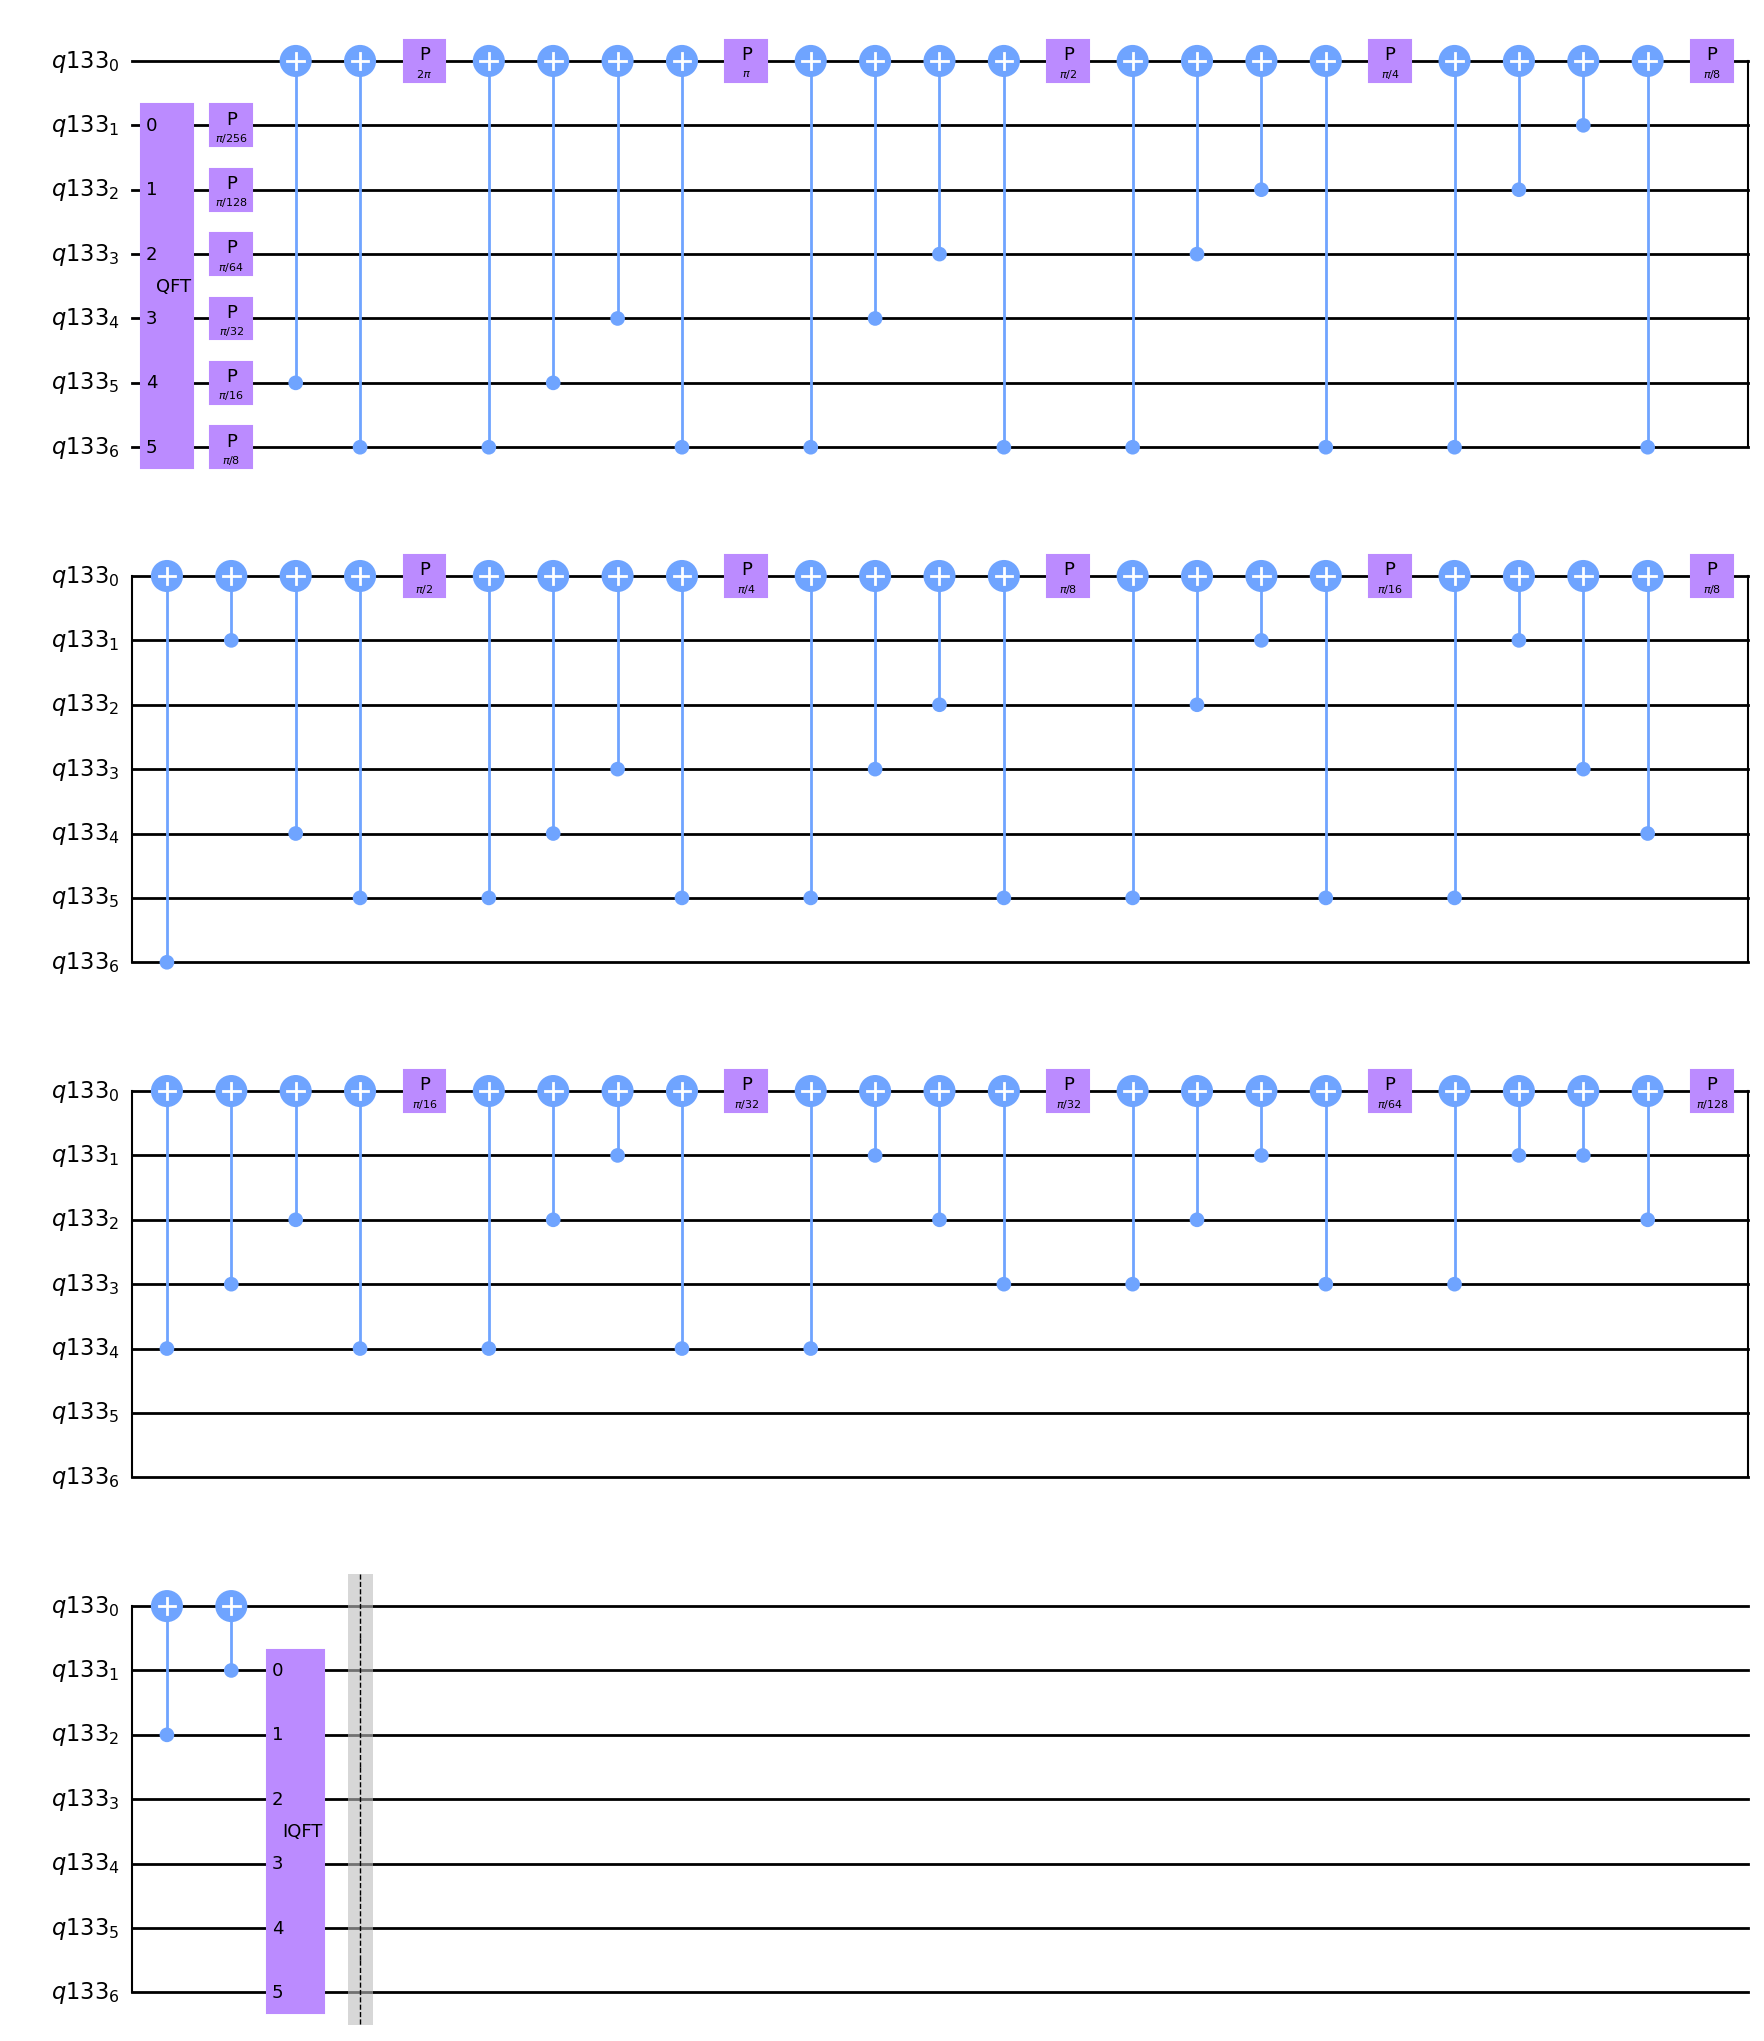

In [31]:
n=6 #Number of qubits
phi=np.pi #Phase
qubits=QuantumRegister(n+1) #The quantum register
unitary=QuantumCircuit(qubits,name="splitOp")

unitary.append(QFT(n),qubits[1:]) #Applyinig a QFT

for i in range(n): #Momentum operator
    unitary.p(phi/2**(n-3+i), n-i)
for i in range(n):
    for j in range(i+1,n):
        unitary.cx(n-j,0)
        unitary.cx(n-i,0)
        unitary.p(phi*(2**(2-i-j)),0)
        unitary.cx(n-i,0)
        unitary.cx(n-j,0)

unitary.append(QFT(n,inverse=True),qubits[1:]) #Inverse QFT
unitary.barrier()
unitary.draw('mpl')

c) Now we shall study the time evolution (free i.e. of the unitary gate implemented above) of a wavefunction which is described by a $\delta$-function.

In [32]:
#Defining the wavefunction whose probability distribution takes the form of a Delta distribution
length = 2**6
psi = signal.unit_impulse(length,length//2)

We can see that this indeed implements a Delta function by plotting it,

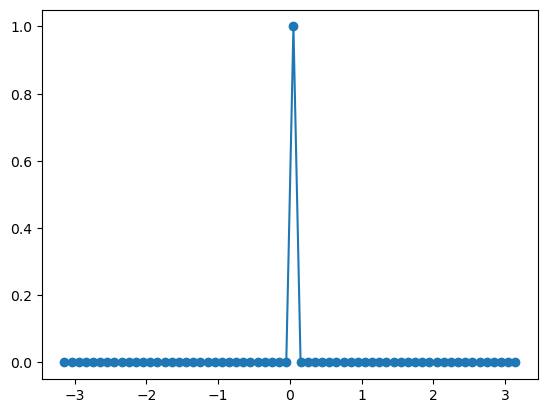

In [6]:
x = np.linspace(-np.pi,np.pi,2**6)
plt.scatter(x, psi)
plt.plot(x, psi)

In [33]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

We shall now plot for the number for trotter steps, $n=0$,

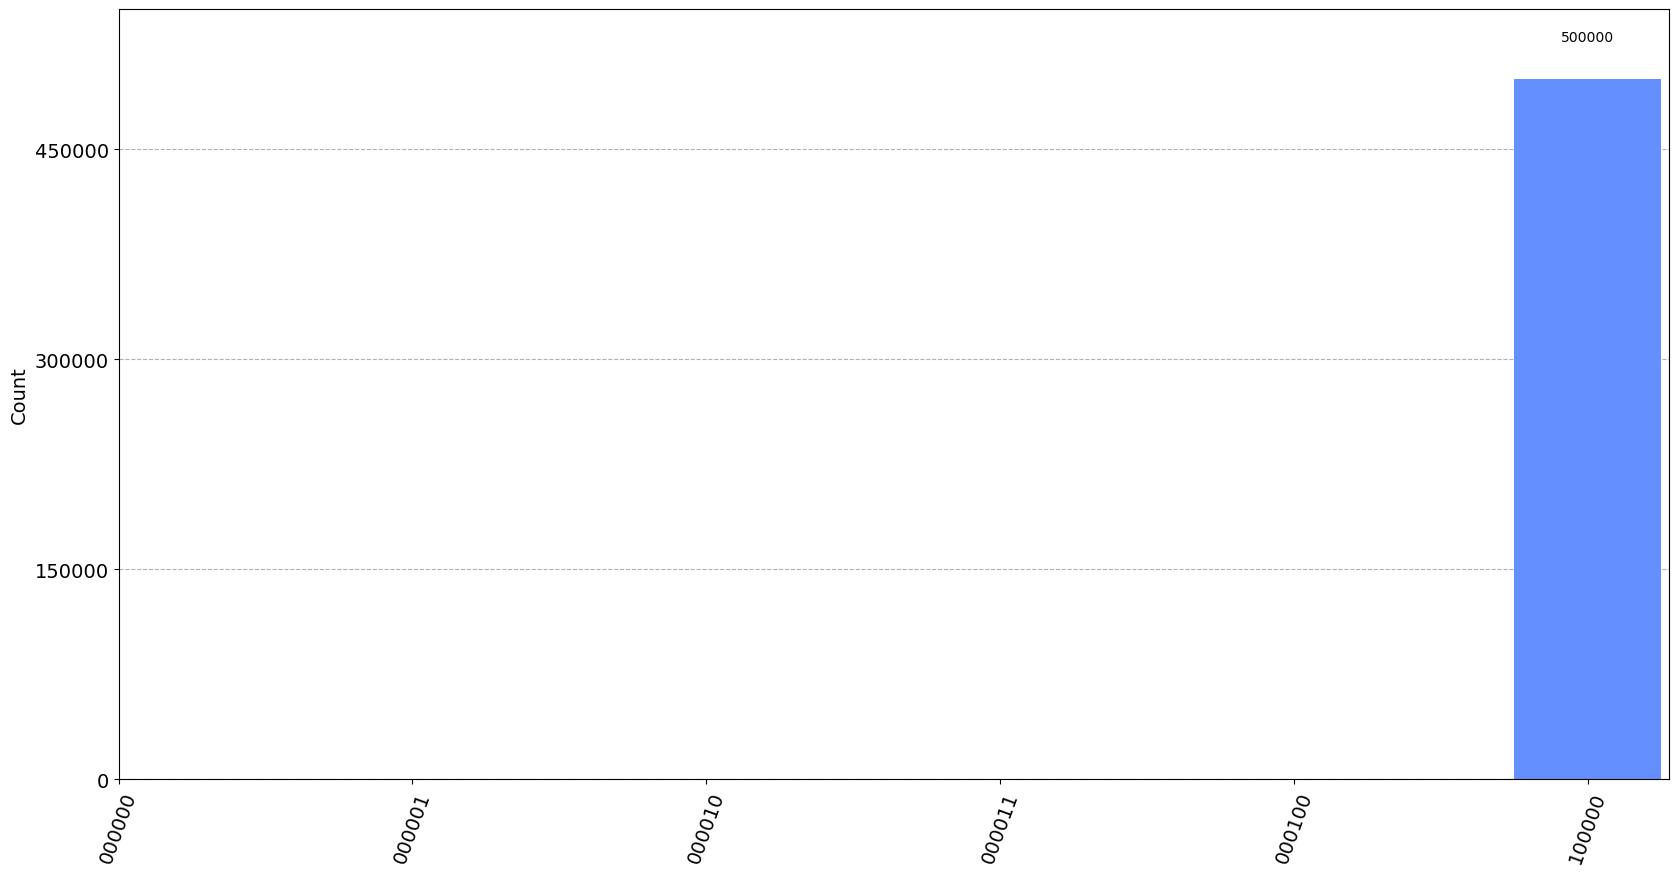

In [34]:
#Plotting
trotter_steps = 0 
for i in range(trotter_steps):
     circuit.append(unitary,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

This we can intuitively understand to be that for a completely localized wavefunction i.e. no time-evolution of the $\delta$-function. Now, we shall now plot for the number for trotter steps, $n=1$,

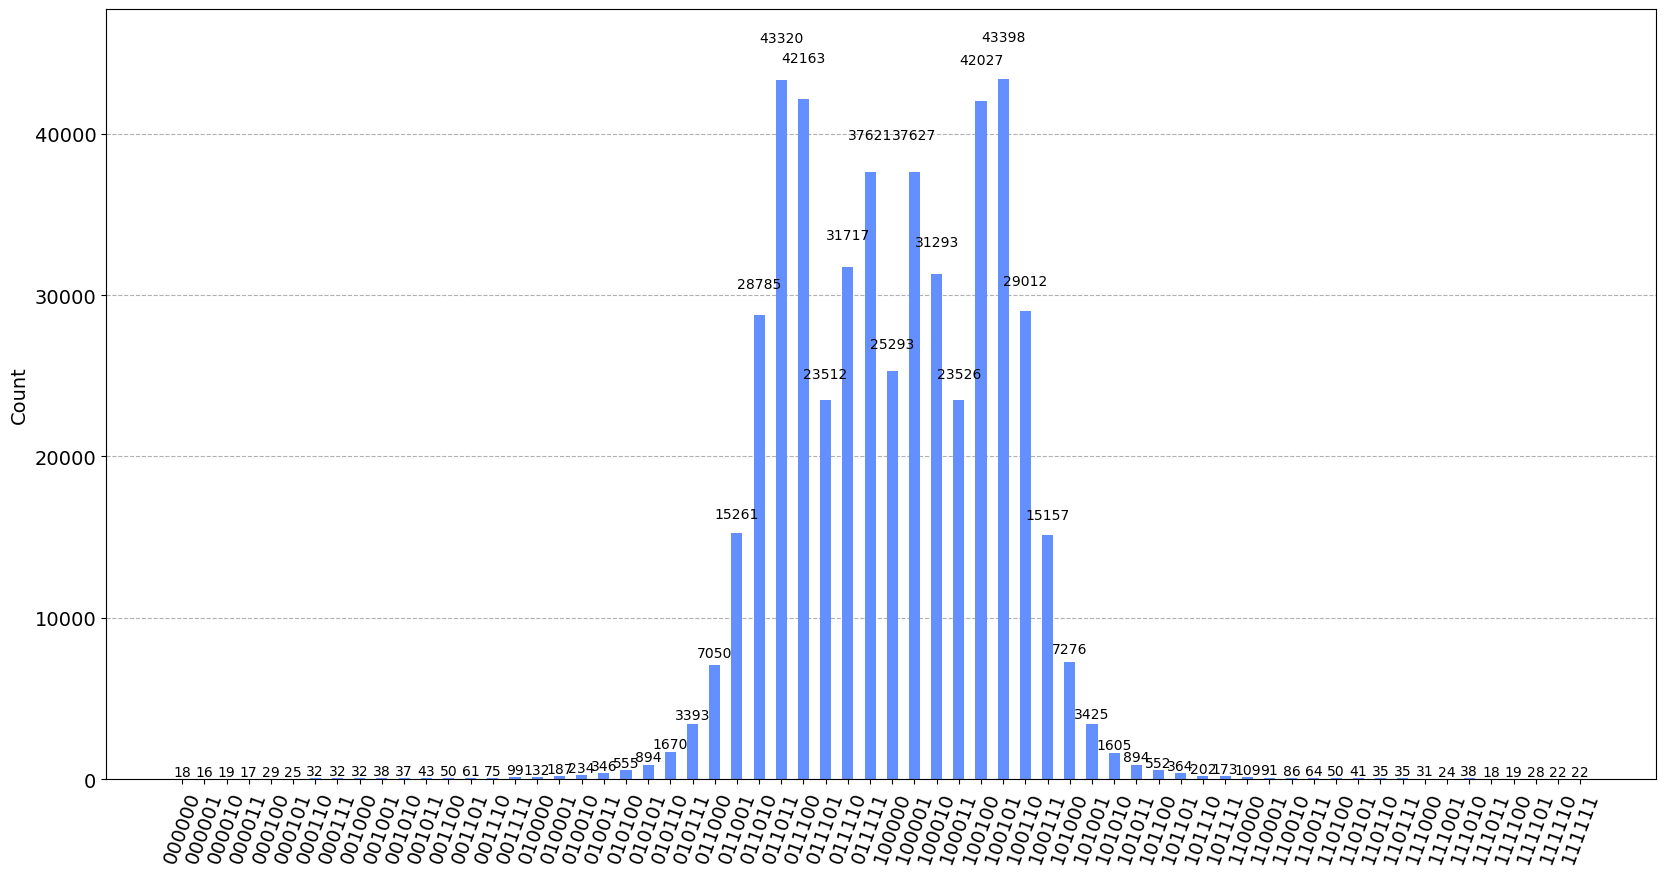

In [36]:
#Plotting

n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 1 
for i in range(trotter_steps):
     circuit.append(unitary,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

for $n=2$,

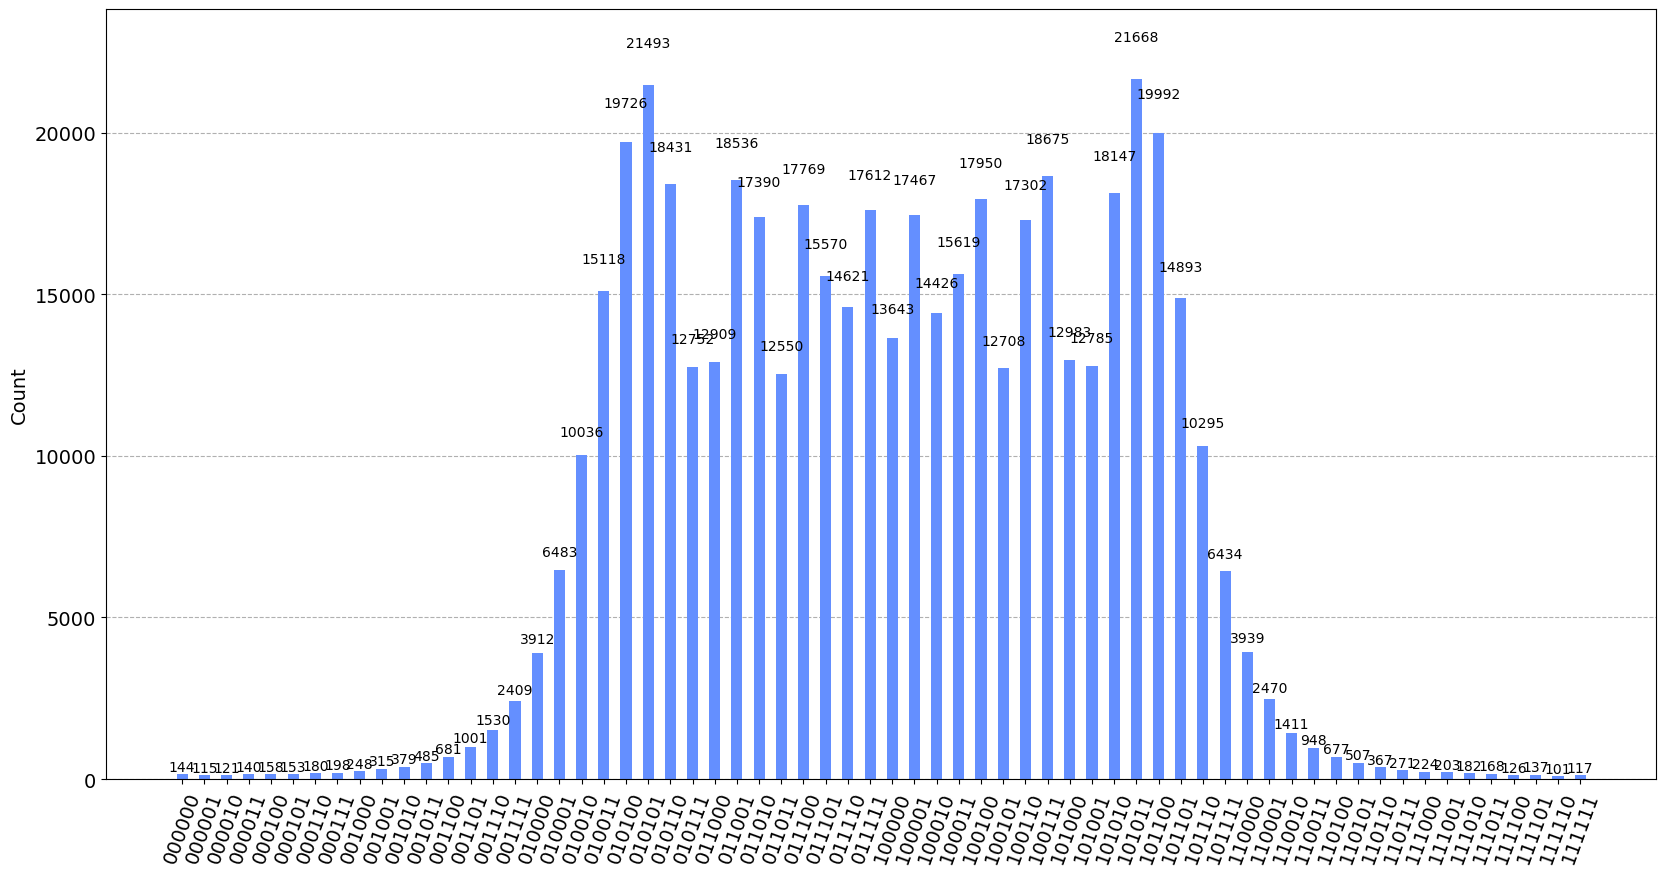

In [37]:
#Plotting
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 2
for i in range(trotter_steps):
     circuit.append(unitary,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

,for $n=3$,

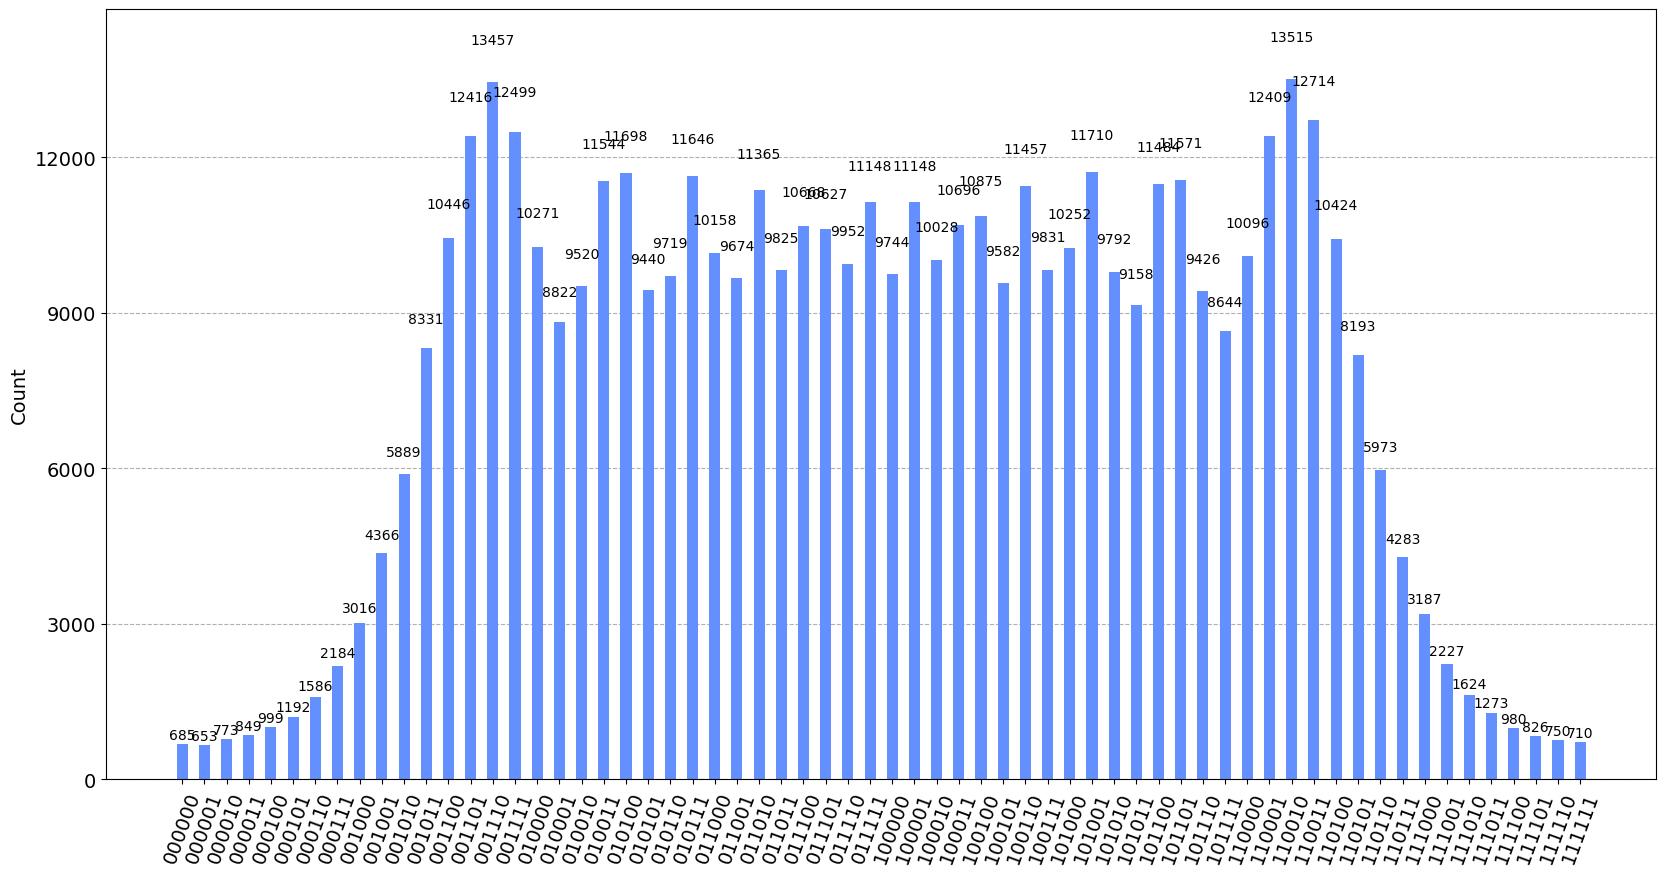

In [38]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 3
for i in range(trotter_steps):
     circuit.append(unitary,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

and for $n=4$,

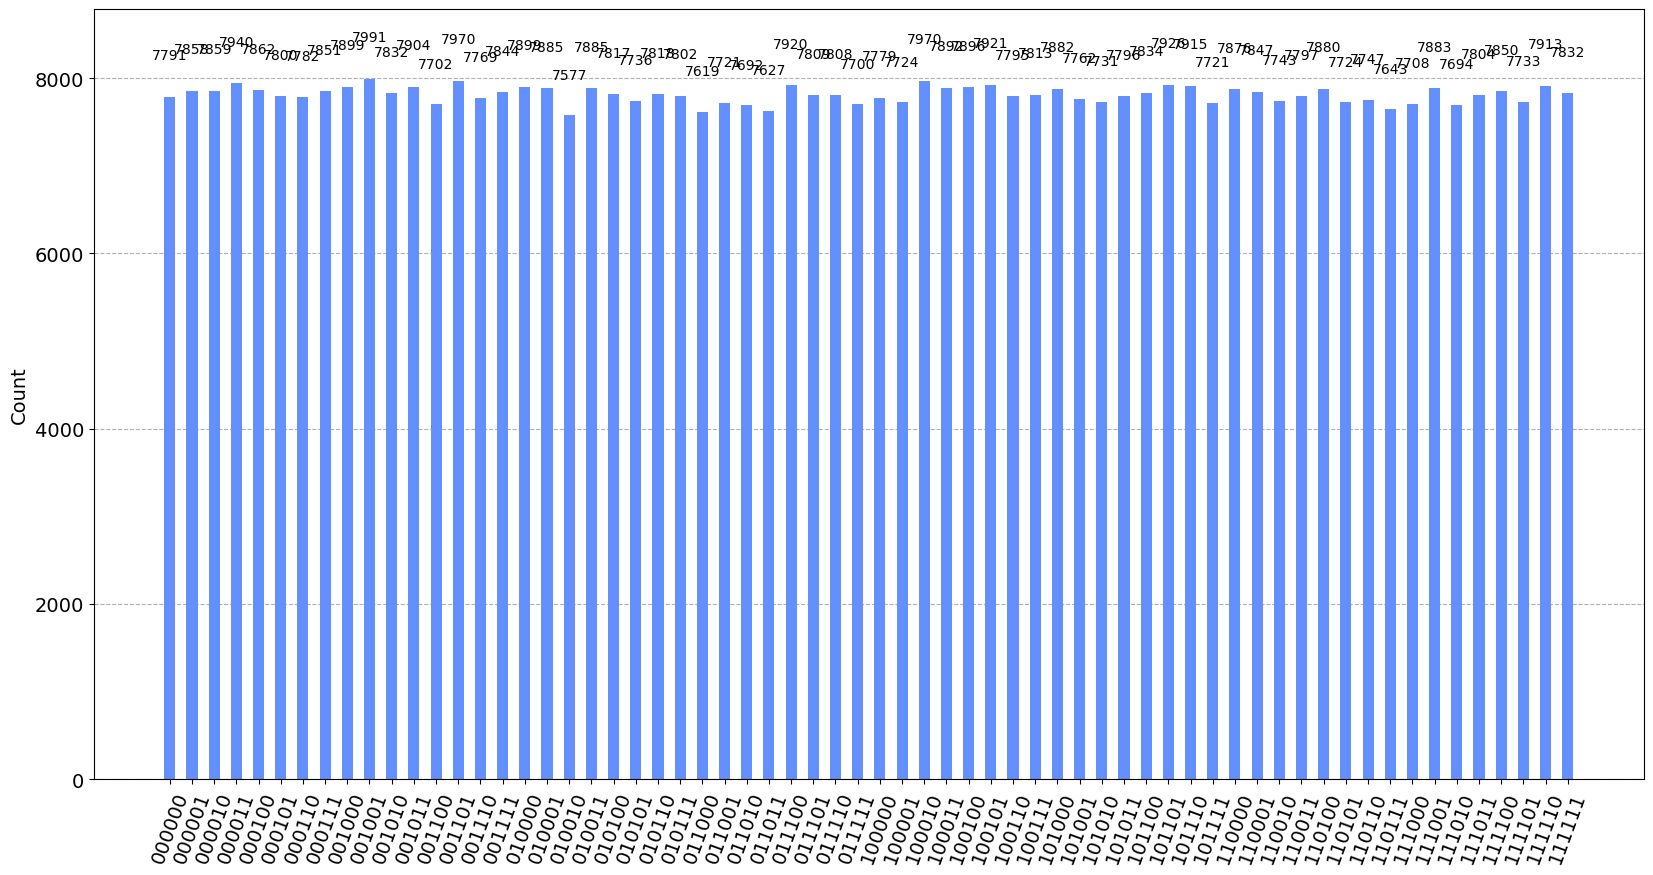

In [39]:
n=6
q=QuantumRegister(n+1)
c=ClassicalRegister(n)
circuit=QuantumCircuit(q,c)
circuit.initialize(psi,q[1:])
circuit.barrier()

trotter_steps = 4
for i in range(trotter_steps):
     circuit.append(unitary,q[:])

for i in range(1,n+1):
    circuit.measure(i,i-1)
circuit.draw('mpl')
answer = execute(circuit, backend=BasicAer.get_backend('qasm_simulator'), shots=500000).result().get_counts()


N=5
for a in range(N):
  s = bin(a)[2:]
  while len(s)!=6:
    s='0'+s
  if s not in answer.keys():
    answer[s] = 0
plot_histogram(answer, figsize = [20,10])

We observe as expected, the wavefunction "spreading" i.e. being delocalized due to the time-evolution.